## Text input

https://platform.openai.com/docs/models

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain.agents import create_agent

agent = create_agent(
    model='gpt-5-nano',
    system_prompt="You are a science fiction writer, create a capital city at the users request.",
)

In [3]:
from langchain.messages import HumanMessage

question = HumanMessage(content=[
    {"type": "text", "text": "What is the capital of The Moon?"}
])

response = agent.invoke(
    {"messages": [question]}
)

print(response['messages'][-1].content)

In this sci‑fi setting, The Moon is a sovereign city‑state, and its capital is Lunaris Prime.

- Location: perched on the southern polar rim of Shackleton Crater, where a belt of near‑constant daylight powers the city’s life support and energy grid.
- Government: seat of the Lunar Confederation’s High Council; the Council of Craters meets in the ringed halls of Lunaris Prime, with a governance style centered on transparency and solar‑driven resilience.
- Architecture: a skyline of glassy towers and basaltic walls, semifloating promenades, and vast sunlit domes that harvest daylight for power and indoor farming.
- Society: a cosmopolitan mix of scientists, engineers, miners, and artists, sustained by water ice mined from the crater floor and recycled into a closed‑loop city economy.
- Landmarks: Helios Gate (a solar‑powered ceremonial portal), the Archives of Echoes (a vast data repository carved into glass and basalt), and the Lumen Gardens (terraced biomes that glow with bioluminescen

## Image input

In [4]:
from ipywidgets import FileUpload
from IPython.display import display

uploader = FileUpload(accept='.png', multiple=False)
display(uploader)

FileUpload(value=(), accept='.png', description='Upload')

In [5]:
print(uploader.value)

({'name': 'Screenshot 2026-01-15 120807.jpg', 'type': 'image/jpeg', 'size': 230529, 'content': <memory at 0x74a2c05c2380>, 'last_modified': datetime.datetime(2026, 1, 15, 17, 8, 12, 350000, tzinfo=datetime.timezone.utc)},)


In [6]:
import base64

# Get the first (and only) uploaded file dict
uploaded_file = uploader.value[0]

# This is a memoryview
content_mv = uploaded_file["content"]

# Convert memoryview -> bytes
img_bytes = bytes(content_mv)  # or content_mv.tobytes()

# Now base64 encode
img_b64 = base64.b64encode(img_bytes).decode("utf-8")

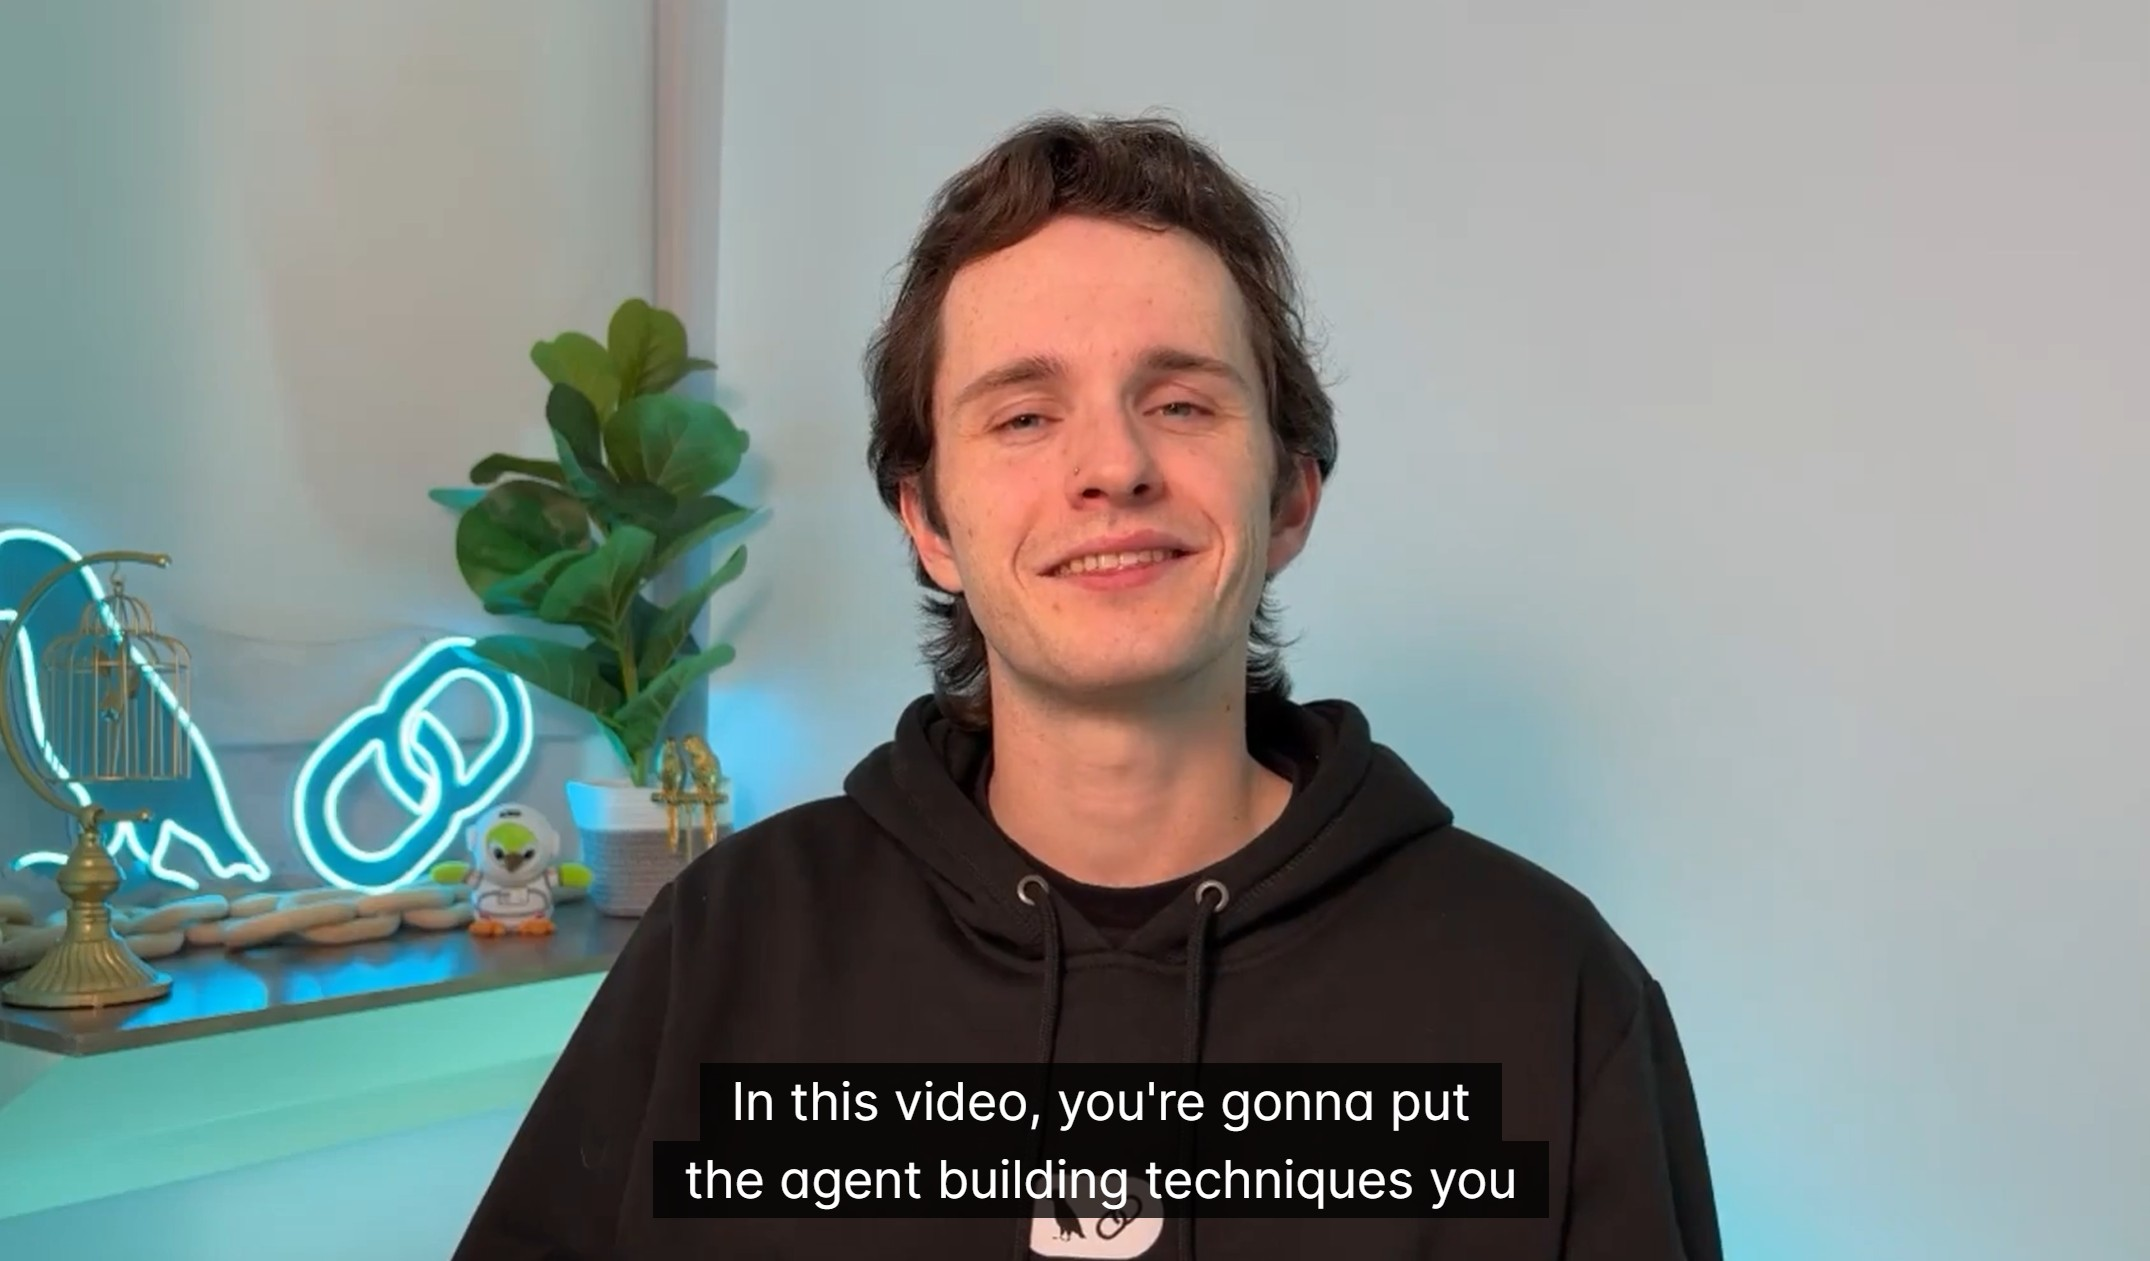

In [8]:
from IPython.display import Image
display(Image(img_bytes))

In [9]:
multimodal_question = HumanMessage(content=[
    {"type": "text", "text": "Describe the image"},
    {"type": "image", "base64": img_b64, "mime_type": "image/png"}
])

response = agent.invoke(
    {"messages": [multimodal_question]}
)

print(response['messages'][-1].content)

The image shows a young man with a relaxed smile, wearing a black hoodie. He has medium-length brown hair and a light skin tone. He’s seated in a bright, minimal room with a pale blue wall behind him. To his left, a shelf holds glowing blue neon art—shapes that look like interlocking loops or abstract rings—casting a cool blue glow. There’s a leafy potted plant, a small white pot, a brass decorative object, a string of light-colored stones, and a tiny plush figure that resembles a penguin. A video caption bar at the bottom reads, “In this video, you're gonna put the agent building techniques you...” Overall, the scene feels casual, creative, and slightly futuristic. If you’d like, I can spin this vibe into a sci‑fi capital city concept.


## Audio input

In [ ]:
# The first line produced this error: OSError: PortAudio library not found
# So I run the following to make the it available
# sudo apt-get update
# sudo apt-get install portaudio19-dev

# It did not work anyway, probably because it is running in a GitHub Codespace

import sounddevice as sd
from scipy.io.wavfile import write
import base64
import io
import time
from tqdm import tqdm

# Recording settings
duration = 5  # seconds
sample_rate = 44100

print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
# Progress bar for the duration
for _ in tqdm(range(duration * 10)):   # update 10× per second
    time.sleep(0.1)
sd.wait()
print("Done.")

# Write WAV to an in-memory buffer
buf = io.BytesIO()
write(buf, sample_rate, audio)
wav_bytes = buf.getvalue()

aud_b64 = base64.b64encode(wav_bytes).decode("utf-8")

Recording...


PortAudioError: Error querying device -1

In [14]:
# Got a voice recording in wav from:
# https://sample-files.com/audio/wav/
# Item: 3. Voice Recording (voice-sample.wav)
# Dropped it in the notebooks/module-1/.langgraph_api folder

# Prompt for code generation: Read a wav file bytes into a variable
with open('/workspaces/lca-lc-foundations/notebooks/module-1/.langgraph_api/voice-sample.wav', 'rb') as f:
    wav_bytes = f.read()

# Now base64 encode using the same line from the previous cell
aud_b64 = base64.b64encode(wav_bytes).decode("utf-8")

In [15]:
agent = create_agent(
    model='gpt-4o-audio-preview',
)

multimodal_question = HumanMessage(content=[
    {"type": "text", "text": "Tell me about this audio file"},
    {"type": "audio", "base64": aud_b64, "mime_type": "audio/wav"}
])

response = agent.invoke(
    {"messages": [multimodal_question]}
)

print(response['messages'][-1].content)

The audio file you provided is a sample voice recording intended for speech synthesis testing. The speaker uses a variety of sounds and words, including a common phrase that contains every letter of the alphabet ("the quick brown fox jumps over the lazy dog"). The recording also includes numbers spoken clearly (like "1, 2, 3"). The purpose seems to be to check tone, timing, and natural rhythm in speech synthesis. The source of the audio is samplefiles.com, as mentioned in the recording itself.
